# Comparison of Different Classifiers and Metrics
## DSC-6135: Introduction to Machine Learning and Computational Statistics

### Import important libraries

In [5]:
import numpy as np
import pandas as pd
import scipy as sp

#import data processing
from sklearn.model_selection import train_test_split

#import models
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.ensemble import RandomForestClassifier as RandomForest

#import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

#import visualization libraries
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Define functions to generate and visualize data

In [15]:
def make_toy_data():
    '''
    make_toy_data generates synthetic data for the cancer classification task.
    
    input: None
    returns: 
       x_train - an numpy array of size 737 x 2, each row is a patient, each column is a biomarker
       x_test - an numpy array of size 363 x 2, each row is a patient, each column is a biomarker
       y_train - an numpy array of length 737, each entry is either 0 (no cancer) or 1 (cancerous)
       y_test - an numpy array of length 363, each entry is either 0 (no cancer) or 1 (cancerous)
    '''
    
    class_0_size = 1000
    mu_0 = np.array([10, 15])
    Sigma_0 = np.array([[50, -30], 
                        [-30, 80]])
    class_0 = np.random.multivariate_normal(mu_0, Sigma_0, size=class_0_size)

    class_1_size = 100
    mu_1 = np.array([22, 6])
    Sigma_1 = np.array([[20, 5], 
                        [5, 20]])
    class_1 = np.random.multivariate_normal(mu_1, Sigma_1, size=class_1_size)
    
    x = np.vstack((class_0, class_1))
    y = np.hstack((np.zeros(class_0_size), np.ones(class_1_size)))
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
    return x_train, x_test, y_train, y_test

def scatter_plot_data(x, y, ax):
    '''
    scatter_plot_data scatter plots the patient data. A point in the plot is colored 'red' if cancerous 
    and blue otherwise.
    
    input:
       x - a numpy array of size N x 2, each row is a patient, each column is a biomarker
       y - a numpy array of length N, each entry is either 0 (no cancer) or 1 (cancerous)
       ax - axis to plot on
    returns: 
       ax - the axis with the scatter plot
    '''
    ax.scatter(x[y == 1, 0], x[y == 1, 1], alpha=0.2, c='red', label='class 1')
    ax.scatter(x[y == 0, 0], x[y == 0, 1], alpha=0.2, c='blue', label='class 0')
    ax.set_xlim((-20, 40))
    ax.set_ylim((-20, 40))
    ax.set_xlabel('marker 1')
    ax.set_ylabel('marker 2')
    ax.legend(loc='best')
    return ax

---

# Application #1: Cancer Diagnosis Based on Biopsy Markers

In this problem, we **revisit** the task of classifying whether or not a patient has a rare and aggressive type of skin cancer based on two biomarkers extracted from biopsies of skin samples.

Last time, we decided that:
1. ***accuracy*** is a bad metric (even terribles models can have 100% accuracy simply due to class imbalance).

2. visualizing the ***decision boundary*** of a classifier is a better way to evaluate model performance, but it is not possible to visualize most real-datasets (due to the large number of features).

2. the ***confusion matrix*** is a better way to assess the performance of classifiers, but we still prefer a single number to summarize aspects of the matrix we care about.

Today, we see that we can build many metrics from the confusion matrix:

1. True positive rate
2. True negative rate
3. Precision (implemented by `sklearn`)
4. Recall (implemented by `sklearn`)
5. Positive predictive value
6. Negative predictive value
7. Macro f1 score (implemented by `sklearn`)
9. AUC (implemented by `sklearn`)

#### Make a toy training and testing classification data set 

We generate toy data for this application. `x` is a an array where each row represents a patient and each column represents a biomarker. `y` is an array of `0`'s and `1`'s, where `0` indicates absence of cancer and `1` indicates presence of cancer.

In [7]:
x_train, x_test, y_train, y_test = make_toy_data()

In [8]:
print('Number of patients:', x_train.shape[0])
print('Number of features:', x_train.shape[1])

Number of patients: 737
Number of features: 2


#### Visualize our data

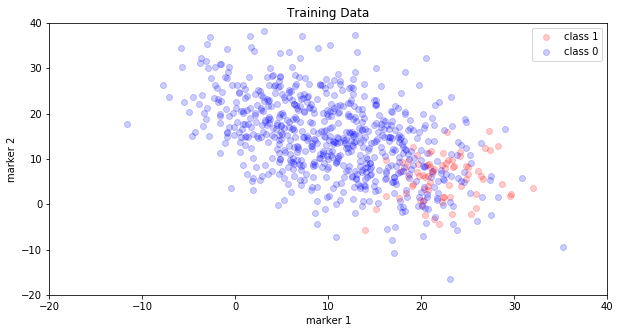

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
scatter_plot_data(x_train, y_train, ax)
ax.set_title('Training Data')
plt.show()

---

## Exercise 1: choose an appropriate metric for this real-life task and this dataset
Which of the metrics should we choose to evaluate our classifiers for this real-life task and this particular dataset? Justify your choice.

Which of the metrics implemented by `sklearn` should we choose to evaluate our classifiers for this real-life task and this particular dataset? 


## Exercise 2: compare the performance of different classifiers on this dataset using your chosen metric

### Logistic regression with linear boundary

In [10]:
logistic = LogisticRegression(solver='lbfgs')
logistic.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Logistic regression with polynomial boundary
Try different polynomial degrees.

In [11]:
#transform your training and testing data into polynomial features
degree_of_polynomial = 2
polynomial_features = PolynomialFeatures(degree_of_polynomial)
polynomial_features.fit(x_train)
x_train_poly = polynomial_features.transform(x_train)
x_test_poly = polynomial_features.transform(x_test)

#fit a logistic regression on top of your polynomial features
logistic_poly = LogisticRegression(solver='lbfgs', max_iter=1000)
logistic_poly.fit(x_train_poly, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Decision tree
Try different depths.

In [12]:
#fit a decision tree
tree = DecisionTree(max_depth=10)
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Random Forest
Try different number of trees and different max_depth of the trees.

In [13]:
#fit a random forest
forest = RandomForest(n_estimators=1000)
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### kNN Classifier

Try a couple of values of `k`.

In [14]:
#fit a kNN classifier
knn = KNN(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Compare your models
Which model is the best according to your metric? Is this the same model that you picked from last time?


## Exercise 3: Address the class imbalance issue in the data

Class imbalance can be addressed by down-sampling and up-sampling. In this exercise you will use the `class_weight` parameter in `sklearn` classifiers to adjust importance assigned to each class. 

For example, if you want to assign twice as much importance to the 0-class when training you do the following:
``` python
LogisticRegression(solver='lbfgs', class_weight={0:2, 1:1})
```

For our cancer dataset, and any classifier of your choice, use the `class_weight` parameter to assign different importance to the two classes. Which settings of the `class_weight` parameter is more appropriate for our task and our data?

---

# Application #2: Loan Approval Recommendation

When you apply for a home loan loan at a bank, your application is examined by a loan officer. When deciding whether to approve your loan application, the loan officer considers how likely you are to default on your loan. Typically, home loans have low default rates.

## Choose an appropriate metric to evaluate a model that  recommends loan approval
Imagine you are building a classifier to predict whether or not a person will default on a loan; based on your model, the bank will decide whether or not to approve their loan application. Which metric should you choose to evaluate your model? Why?

---

# Application #3: Bail Recommendation

In the American criminal justic system, when a person is accused of a crime and arrested, their guilt is determined by a trial. The trial can be scheduled anytime between 3 weeks to 6 months after the arrest. 

Typically, a judge determines if the accused can return home while waiting for their trial or if they must sit in jail while they wait for their trial. If the judge decides to release the accused, we say that they are given **bail**.

When a judge decides whether or not to grant bail to a person, he/she considers if the person is likely to commit a crime if they are released. In reality, it is relatively rare that a person commits a crime while waiting for trial.

## Choose an appropriate metric to evaluate a model that  recommends bail
Imagine you are building a classifier to predict whether or not a person will commit a crime when released; based on your model the judge will choose whether or not to give the accused bail. Which metric should you choose to evaluate your model? Why?


# Application #4: Match Metrics to Real-life Tasks

For each of the following metrics, describe a scenario (or a general type of scenario) where that metric is an appropriate way to evaluate a classifier:

1. True positive rate
2. True negative rate
3. Precision
4. Recall
5. Positive predictive value
6. Negative predictive value